# Let's split the dataset in two

In [64]:
import pandas as pd
#df = pd.read_csv('cleandat_with_no_missingvalue.csv')
df = pd.read_csv('complet.csv')
df.head()

,BMI,Age,Birthweight,N qualifying teeth,BL %BOP,BL PD avg,BL %PD>4,BL %PD>5,BL CAL avg,BL %CAL>2,...,V3 CAL avg,V3 %CAL>3,V3 Calc I,V5 %BOP,V5 %PD>4,V5 %PD>5,V5 %CAL>2,V5 %CAL>3,outcome,treatment
0,28.0,25,3490.0,13,48.214,2.696,17.857,5.357,1.291,38.182,...,1.557,17.365,1.111,86.310,23.214,11.310,44.643,13.095,0.0,1
1,21.0,21,2350.0,12,79.762,2.685,17.857,10.119,1.119,25.000,...,1.446,7.407,0.944,61.905,21.429,9.333,42.857,7.738,1.0,1
2,24.0,25,2525.0,16,80.247,2.821,25.309,12.346,1.407,42.593,...,1.331,9.524,0.472,67.857,19.643,7.246,48.246,6.548,0.0,0
3,36.0,36,3650.0,15,100.000,2.814,17.308,5.769,1.494,38.312,...,2.282,39.103,1.778,99.359,49.359,26.923,79.487,39.103,0.0,1
4,27.0,21,3865.0,16,94.048,2.768,23.214,14.286,1.327,40.476,...,1.280,13.095,0.806,56.548,22.024,13.690,44.048,13.690,0.0,1


# Let's normalized the dataset

In [65]:
import pandas as pd
from sklearn import preprocessing
tst= df.drop(['outcome'],axis=1)

x = tst.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
tst=pd.DataFrame(x_scaled,columns=tst.columns)
tst.head()

,BMI,Age,Birthweight,N qualifying teeth,BL %BOP,BL PD avg,BL %PD>4,BL %PD>5,BL CAL avg,BL %CAL>2,...,V3 %PD>5,V3 CAL avg,V3 %CAL>3,V3 Calc I,V5 %BOP,V5 %PD>4,V5 %PD>5,V5 %CAL>2,V5 %CAL>3,treatment
0,0.245283,0.321429,0.669895,0.40,0.215946,0.165168,0.149441,0.058440,0.224159,0.366742,...,0.169228,0.390100,0.202592,0.420993,0.858030,0.276591,0.149613,0.450180,0.154059,1.0
1,0.113208,0.178571,0.444554,0.36,0.693591,0.163018,0.149441,0.110389,0.189299,0.231707,...,0.068919,0.361631,0.086415,0.357711,0.604942,0.255323,0.123461,0.432170,0.091035,1.0
2,0.169811,0.321429,0.479146,0.52,0.700934,0.189601,0.227394,0.134683,0.247669,0.411928,...,0.125638,0.332136,0.111114,0.178856,0.666667,0.234043,0.095853,0.486513,0.077035,0.0
3,0.396226,0.714286,0.701522,0.48,1.000000,0.188233,0.143698,0.062934,0.265302,0.368074,...,0.347928,0.576045,0.456203,0.673740,0.993353,0.588104,0.356148,0.801547,0.460035,1.0
4,0.226415,0.178571,0.744021,0.52,0.909885,0.179242,0.205479,0.155847,0.231455,0.390242,...,0.169228,0.319056,0.152776,0.305419,0.549389,0.262412,0.181097,0.444180,0.161059,1.0


In [66]:
control = tst[tst['treatment']==0.]
tretme = tst[tst['treatment']==1.]
print(len(control), len(tretme))
control.isna().sum()
control_age_greater25 = control[control['Age']>=0.25] 
control_age_less25 = control[control['Age']<0.25] 

treatment_age_greater25 = tretme[tretme['Age']>=0.25] 
treatment_age_less25 = tretme[tretme['Age']<0.25] 

y_control_greater25= control_age_greater25["Birthweight"]
y_control_age_less25 = control_age_less25["Birthweight"]

control_age_greater25 = control_age_greater25.drop(["Birthweight"],axis=1)
control_age_less25 = control_age_less25.drop(["Birthweight"],axis=1)


y_treatment_greater25= treatment_age_greater25["Birthweight"]
y_treatment_age_less25 = treatment_age_less25["Birthweight"]

treatment_age_greater25 = treatment_age_greater25.drop(["Birthweight"],axis=1)
treatment_age_less25 = treatment_age_less25.drop(["Birthweight"],axis=1)


408 406


# S-Learner 

In [67]:
age_greater25 = tst[tst['Age']>=0.25] 
age_less25 = tst[tst['Age']<0.25]

In [68]:
# Visualization
import seaborn as sns
from lightgbm import LGBMRegressor

In [69]:
# Initiate the light GBM model
s_learner_greater = LGBMRegressor()
s_learner_less = LGBMRegressor()
#
y_great=age_greater25['Birthweight']
features_great = age_greater25.drop(['Birthweight'],axis=1)

y_less=age_less25['Birthweight']
features_less = age_less25.drop(['Birthweight'],axis=1)

# Fit the model
s_learner_greater.fit(features_great, y_great)

# Fit the model
s_learner_less.fit(features_less, y_less)

# Set treatment value to 1
with_treatment_great = features_great.assign(treatment = 1)
with_treatment_less = features_less.assign(treatment = 1)
# With treatment predictions
with_treatment_predict_great = s_learner_greater.predict(with_treatment_great)
with_treatment_predict_less= s_learner_less.predict(with_treatment_less)
# Set treatment value to 0
without_treatment_great = features_great.assign(treatment = 0)
without_treatment_less = features_less.assign(treatment = 0)
# With treatment predictions
without_treatment_predict_great = s_learner_greater.predict(without_treatment_great)
without_treatment_predict_less = s_learner_less.predict(without_treatment_less)

# ITE
ite_great= with_treatment_predict_great - without_treatment_predict_great
ite_less= with_treatment_predict_less - without_treatment_predict_less
# Save ITE data in a pandas dataframe
ite_df_greater = pd.DataFrame({'ITE': ite_great, 'with_treatment_predict':with_treatment_predict_great, 'without_treatment_predict': without_treatment_predict_great})
ite_df_less = pd.DataFrame({'ITE': ite_less, 'with_treatment_predict':with_treatment_predict_less, 'without_treatment_predict': without_treatment_predict_less})


array([[<AxesSubplot:title={'center':'ITE'}>]], dtype=object)

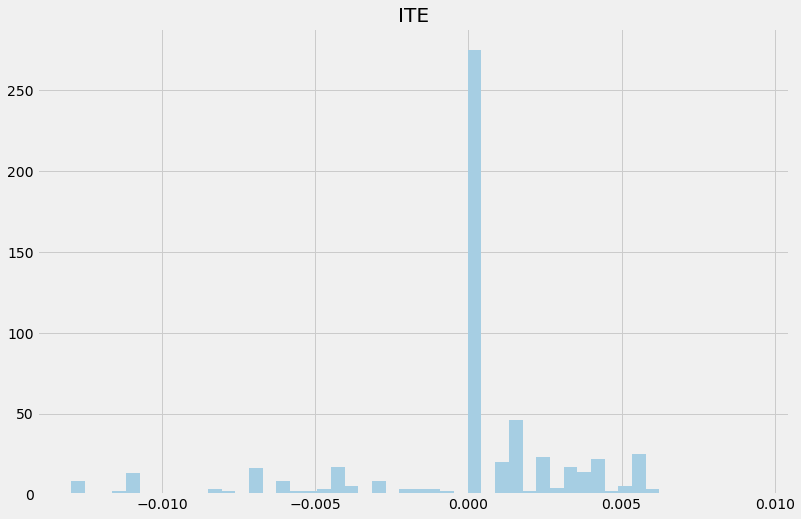

In [70]:
ite_df_greater.hist(column ='ITE', bins=50, grid=True, figsize=(12, 8))

array([[<AxesSubplot:title={'center':'ITE'}>]], dtype=object)

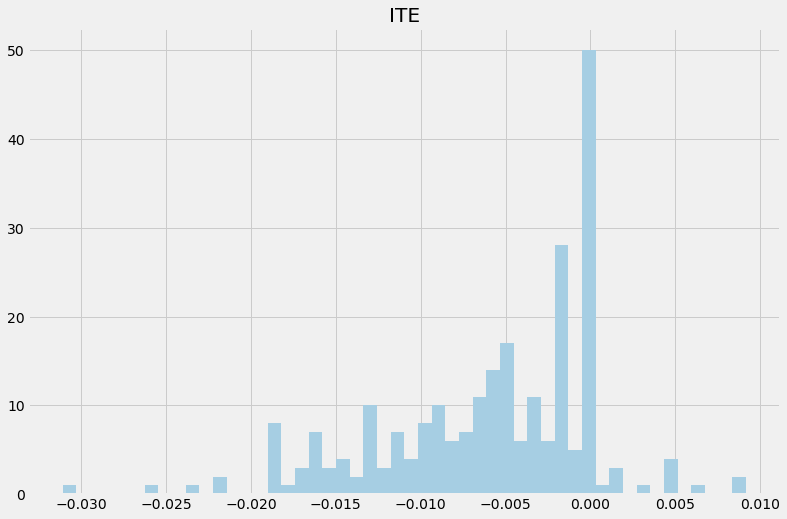

In [71]:
ite_df_less.hist(column ='ITE', bins=50, grid=True, figsize=(12, 8))

In [72]:
# Calculate ATE
ATE = ite_great.mean()
# Print out results
print(f'The average treatment effect (ATE) for age >=25 is {ATE:.2f}')

# Calculate ATE
ATE_less = ite_less.mean()
# Print out results
print(f'The average treatment effect (ATE) for age < 25 is {ATE_less:.2f}')

The average treatment effect (ATE) for age >=25 is -0.00
The average treatment effect (ATE) for age < 25 is -0.01


<AxesSubplot:xlabel='segment', ylabel='count'>

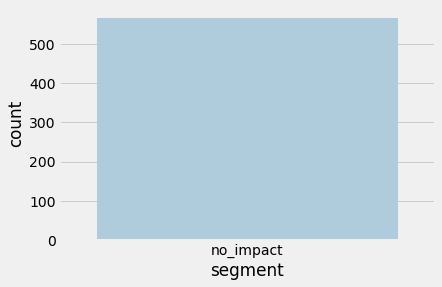

In [73]:
# Create the segmentation function
def segmentation(x):
    if x < -0.5:
        return 'sleeping-dog'
    elif x > 0.5:
        return 'persuadable'
    else:
        return 'no_impact'
# Apply the function 
ite_df_greater['segment'] = ite_df_greater['ITE'].apply(segmentation)
# Visualization
sns.countplot(x=ite_df_greater['segment'])

<AxesSubplot:xlabel='segment', ylabel='count'>

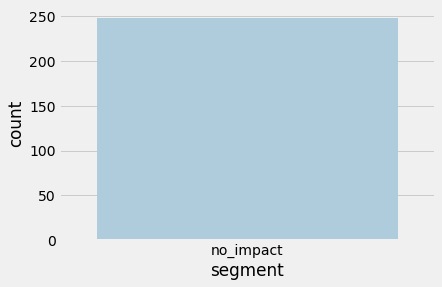

In [74]:
# Create the segmentation function
def segmentation(x):
    if x < -0.5:
        return 'sleeping-dog'
    elif x > 0.5:
        return 'persuadable'
    else:
        return 'no_impact'
# Apply the function 
ite_df_less['segment'] = ite_df_less['ITE'].apply(segmentation)
# Visualization
sns.countplot(x=ite_df_less['segment'])

# # S-learner for the preterm effect

In [76]:
from xgboost import XGBRegressor, XGBClassifier

In [87]:
tst=df.drop(['Birthweight'],axis=1)
x = tst.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
tst=pd.DataFrame(x_scaled,columns=tst.columns)
tst.head()
tst.head()

,BMI,Age,N qualifying teeth,BL %BOP,BL PD avg,BL %PD>4,BL %PD>5,BL CAL avg,BL %CAL>2,BL %CAL>3,...,V3 CAL avg,V3 %CAL>3,V3 Calc I,V5 %BOP,V5 %PD>4,V5 %PD>5,V5 %CAL>2,V5 %CAL>3,outcome,treatment
0,0.245283,0.321429,0.40,0.215946,0.165168,0.149441,0.058440,0.224159,0.366742,0.057499,...,0.390100,0.202592,0.420993,0.858030,0.276591,0.149613,0.450180,0.154059,0.0,1.0
1,0.113208,0.178571,0.36,0.693591,0.163018,0.149441,0.110389,0.189299,0.231707,0.106659,...,0.361631,0.086415,0.357711,0.604942,0.255323,0.123461,0.432170,0.091035,1.0,1.0
2,0.169811,0.321429,0.52,0.700934,0.189601,0.227394,0.134683,0.247669,0.411928,0.169165,...,0.332136,0.111114,0.178856,0.666667,0.234043,0.095853,0.486513,0.077035,0.0,0.0
3,0.396226,0.714286,0.48,1.000000,0.188233,0.143698,0.062934,0.265302,0.368074,0.143731,...,0.576045,0.456203,0.673740,0.993353,0.588104,0.356148,0.801547,0.460035,0.0,1.0
4,0.226415,0.178571,0.52,0.909885,0.179242,0.205479,0.155847,0.231455,0.390242,0.150582,...,0.319056,0.152776,0.305419,0.549389,0.262412,0.181097,0.444180,0.161059,0.0,1.0


In [88]:
age_greater25 = tst[tst['Age']>=0.25] 
age_less25 = tst[tst['Age']<0.25]

In [89]:
# Initiate the light GBM model
s_learner_greater = XGBClassifier()
s_learner_less = XGBClassifier()
#
y_great=age_greater25['outcome']
features_great = age_greater25.drop(['outcome'],axis=1)

y_less=age_less25['outcome']
features_less = age_less25.drop(['outcome'],axis=1)

# Fit the model
s_learner_greater.fit(features_great, y_great)

# Fit the model
s_learner_less.fit(features_less, y_less)

# Set treatment value to 1
with_treatment_great = features_great.assign(treatment = 1)
with_treatment_less = features_less.assign(treatment = 1)
# With treatment predictions
with_treatment_predict_great = s_learner_greater.predict(with_treatment_great)
with_treatment_predict_less= s_learner_less.predict(with_treatment_less)
# Set treatment value to 0
without_treatment_great = features_great.assign(treatment = 0)
without_treatment_less = features_less.assign(treatment = 0)
# With treatment predictions
without_treatment_predict_great = s_learner_greater.predict(without_treatment_great)
without_treatment_predict_less = s_learner_less.predict(without_treatment_less)

# ITE
ite_great= with_treatment_predict_great - without_treatment_predict_great
ite_less= with_treatment_predict_less - without_treatment_predict_less
# Save ITE data in a pandas dataframe
ite_df_greater = pd.DataFrame({'ITE': ite_great, 'with_treatment_predict':with_treatment_predict_great, 'without_treatment_predict': without_treatment_predict_great})
ite_df_less = pd.DataFrame({'ITE': ite_less, 'with_treatment_predict':with_treatment_predict_less, 'without_treatment_predict': without_treatment_predict_less})


array([[<AxesSubplot:title={'center':'ITE'}>]], dtype=object)

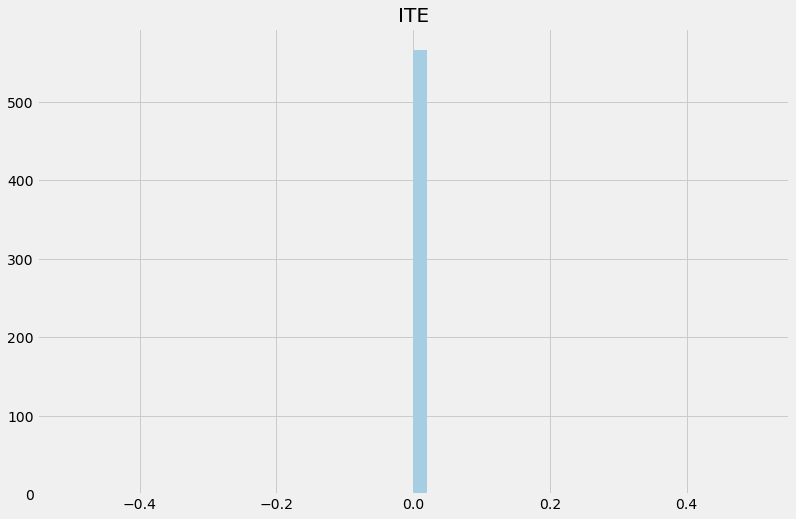

In [91]:
ite_df_greater.hist(column ='ITE', bins=50, grid=True, figsize=(12, 8))

In [92]:
# Calculate ATE
ATE = ite_great.mean()
# Print out results
print(f'The average treatment effect (ATE) for age >=25 is {ATE:.2f}')

# Calculate ATE
ATE_less = ite_less.mean()
# Print out results
print(f'The average treatment effect (ATE) for age < 25 is {ATE_less:.2f}')

The average treatment effect (ATE) for age >=25 is 0.00
The average treatment effect (ATE) for age < 25 is 0.00
